## classifying by PCA

In [1]:
import allel
from collections import namedtuple
import datetime
import h5py
import ingenos
import itertools
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn import model_selection
%matplotlib inline

##### set base directory

In [2]:
base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo"

##### read in data for 2R

In [3]:
v_2R, g_2R = ingenos.import_data(
    "/afs/crc.nd.edu/group/BesanskyNGS2/inversion_genotyping/merged_p2_and_VObs_2R.h5", "2R")

##### read in data for 2L

In [4]:
path_2L = "/afs/crc.nd.edu/group/BesanskyNGS2/inversion_genotyping/merged_p2_and_VObs_2L.h5"
chrom_2L = "2L"

callset_2L = h5py.File(path_2L, mode='r')[chrom_2L]

v_2L = allel.VariantChunkedTable(callset_2L['variants'], index='POS',
                                names=['POS','REF','ALT','DP','MQ','QD','numalt'])

g_2L = allel.GenotypeChunkedArray(callset_2L['calldata']['GT'])

##### read in metadata

In [5]:
md_2L = pd.read_csv(base + "/metadata/all_samples_2L_metadata_080318.csv", sep="\t")
md_2R = pd.read_csv(base + "/metadata/all_samples_2R_metadata_080318.csv", sep="\t")

##### create filters to keep the correct partitions for each inversion

In [6]:
non_outliers = ((md_2R["country"] != "Kenya") &
                (md_2R["country"] != "Gambia, The") &
                (md_2R["country"] != "Guinea-Bissau")).values

west = (md_2R["country"] != "Kenya").values

j_bool = ((md_2R["country"] != "Kenya") & (md_2R["country"] != "Gambia, The") &\
          (md_2R["country"] != "Guinea-Bissau") & (md_2R["country"] != "France") &\
         (md_2R["species"] == "An. gambiae")).values

col_bool = ( (md_2R["ox_code"].isin(md_2R.loc[non_outliers,"ox_code"])) &\
                 (md_2R["species"] == "An. coluzzii"))

gam_bool = ( (md_2R["ox_code"].isin(md_2R.loc[non_outliers,"ox_code"])) &\
                 (md_2R["species"] == "An. gambiae"))

##### 2La

In [7]:
coords_2La, model_2La = ingenos.run_pca("2La", v_2L, g_2L)

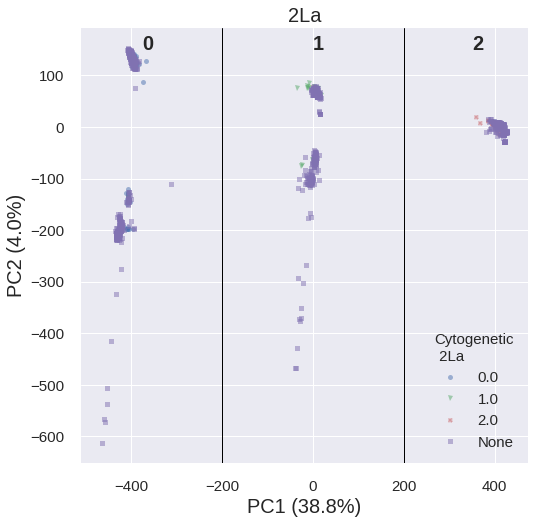

In [8]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
ingenos.plot_pca_coords(coords_2La, model_2La, 0, 1, ax, md_2L,
                region = "2La", label_with = "2La",
               alpha = 0.5, title = "2La")

ax.text( -375, 150, "0", fontsize = 20, weight = 'bold')
ax.text( 0, 150, "1", fontsize = 20, weight = 'bold')
ax.text( 350, 150, "2", fontsize = 20, weight = 'bold')

ax.axvline(x = -200, color = 'k', linewidth = 1)
ax.axvline(x = 200, color = 'k', linewidth = 1)
plt.title("2La", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2La", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp(base + "/data/results/2La_karyotyping_PCA"));

In [9]:
PCA_2La = []

PC1 = coords_2La[:, 0]
PC2 = coords_2La[:, 1]

assert len(PC1) == len(PC2), "Components are somehow different lengths"

for i in range(len(PC1)):
    
    if PC1[i] <= -200:
        
        PCA_2La.append(0)
        
    elif PC1[i] > -200 and PC1[i] <= 200:
        
        PCA_2La.append(1)
        
    else:
        
        PCA_2La.append(2)

##### 2Rj

In [10]:
coords_2Rj, model_2Rj = ingenos.run_pca("2Rj", v_2R, g_2R, samples_bool=j_bool)

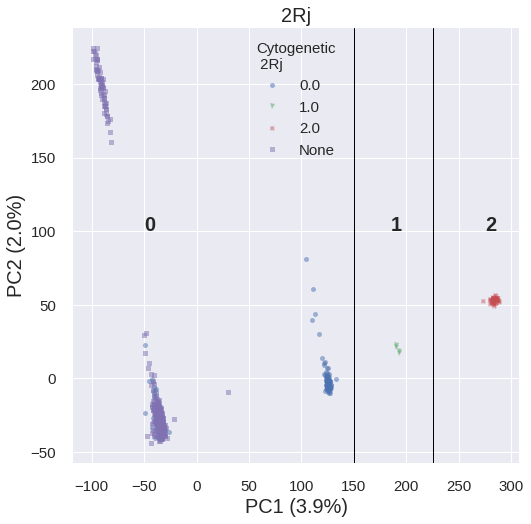

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
ingenos.plot_pca_coords(coords_2Rj, model_2Rj, 0, 1, ax, md_2R[j_bool],
                region = "2Rj", label_with = "2Rj",
               alpha = 0.5, title = "2Rj")

ax.text( -50, 100, "0", fontsize = 20, weight = 'bold')
ax.text( 185, 100, "1", fontsize = 20, weight = 'bold')
ax.text( 275, 100, "2", fontsize = 20, weight = 'bold')

ax.axvline(x = 150, color = 'k', linewidth = 1)
ax.axvline(x = 225, color = 'k', linewidth = 1)

plt.title("2Rj", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rj", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp(base + "/data/results/2Rj_karyotyping_PCA"));

In [12]:
PCA_2Rj = []

PC1 = coords_2Rj[:, 0]
PC2 = coords_2Rj[:, 1]

assert len(PC1) == len(PC2), "Components are somehow different lengths"

for i in range(len(PC1)):
    
    if PC1[i] <= 150:
        
        PCA_2Rj.append(0)
        
    elif PC1[i] > 150 and PC1[i] <= 225:
        
        PCA_2Rj.append(1)
        
    else:
        
        PCA_2Rj.append(2)

##### 2Rb

In [13]:
coords_2Rb, model_2Rb = ingenos.run_pca("2Rb", v_2R, g_2R, samples_bool = west)

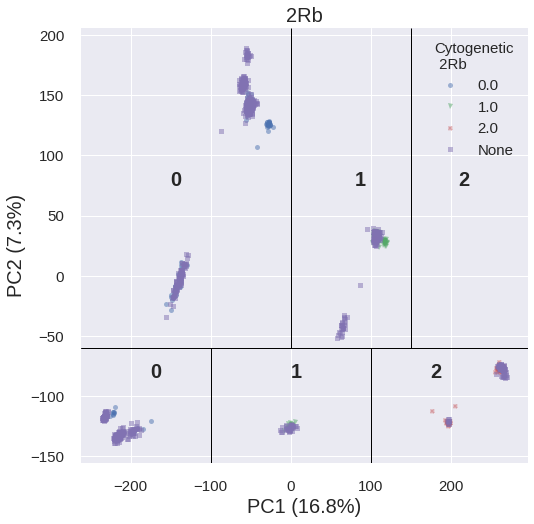

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
ingenos.plot_pca_coords(coords_2Rb, model_2Rb, 0, 1, ax, md_2R[west],
                region = "2Rb", label_with = "2Rb",
               alpha = 0.5, title = "2Rb")

ax.text( -150, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 80, 75, "1", fontsize = 20, weight = 'bold')
ax.text( 210, 75, "2", fontsize = 20, weight = 'bold')
ax.text( -175, -85, "0", fontsize = 20, weight = 'bold')
ax.text( 0, -85, "1", fontsize = 20, weight = 'bold')
ax.text( 175, -85, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -60, color = 'k', linewidth = 1)
ymin, ymax = ax.get_ylim()
plt.vlines(-100, ymin, -60, color='k', linewidth = 1)
plt.vlines(100, ymin, -60, color='k', linewidth = 1)
plt.vlines(0, ymax, -60, color='k', linewidth = 1)
plt.vlines(150, ymax, -60, color='k', linewidth = 1)

ax.set_ylim(bottom=ymin, top=ymax)

plt.title("2Rb", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rb", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp(base + "/data/results/2Rb_karyotyping_PCA"));

In [15]:
PCA_2Rb = []

PC1 = coords_2Rb[:, 0]
PC2 = coords_2Rb[:, 1]

assert len(PC1) == len(PC2), "Components are somehow different lengths"

for i in range(len(PC1)):
    
    if PC2[i] <= -60:
        
        if PC1[i] <= -100:
            
            PCA_2Rb.append(0)
            
        elif PC1[i] > -100 and PC1[i] <= 100:
            
            PCA_2Rb.append(1)
            
        else:
            
            PCA_2Rb.append(2)
            
    else:
        
        if PC1[i] <= 0:
            
            PCA_2Rb.append(0)
            
        elif PC1[i] > 0 and PC1[i] <= 150:
            
            PCA_2Rb.append(1)
        
        else:
            
            PCA_2Rb.append(2)

##### 2Rc

In [16]:
coords_2Rc, model_2Rc = ingenos.run_pca("2Rc", v_2R, g_2R, samples_bool=non_outliers)

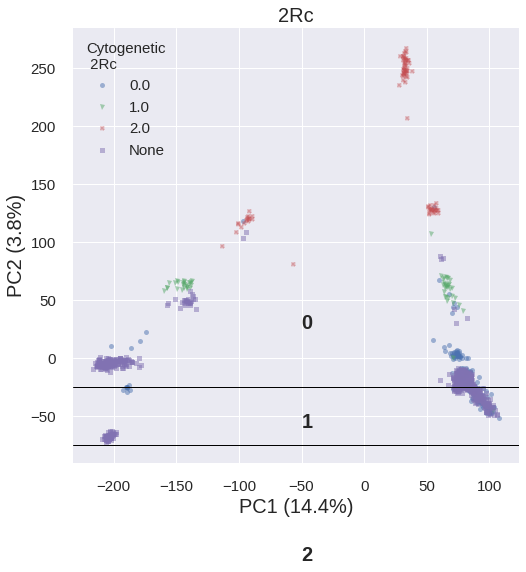

In [17]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
ingenos.plot_pca_coords(coords_2Rc, model_2Rc, 0, 1, ax, md_2R[non_outliers],
                region = "2Rc", label_with = "2Rc",
               alpha = 0.5, title = "2Rc")

ax.text( -50, 25, "0", fontsize = 20, weight = 'bold')
ax.text( -50, -60, "1", fontsize = 20, weight = 'bold')
ax.text( -50, -175, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -25, color = 'k', linewidth = 1)
ax.axhline(y = -75, color = 'k', linewidth = 1)

plt.title("2Rc", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rc", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp(base + "/data/results/2Rc_karyotyping_PCA"));

In [18]:
PCA_2Rc = []

PC1 = coords_2Rc[:, 0]
PC2 = coords_2Rc[:, 1]

assert len(PC1) == len(PC2), "Components are somehow different lengths"

for i in range(len(PC1)):
    
    if PC2[i] > -25:
        
        PCA_2Rc.append(0)
        
    elif PC2[i] <= -25 and PC2[i] > -75:
        
        PCA_2Rc.append(1)
        
    else:
        
        PCA_2Rc.append(2)

##### 2Rd

##### for 2Rd, we excluded the distal part of the inversion from the PCA to get a signal less influenced by the overlapping 2Ru inversion

In [19]:
d_sites_expression = '( (POS > 41000000) & (POS < 42375004) )'

d_sites_bool = v_2R.eval(d_sites_expression)

np.sum(d_sites_bool)

217929

In [20]:
two_Rd_alt_alleles, two_Rd_which_alleles = ingenos.filter_and_convert_genotypes(g_2R,
                                            sites_boolean = d_sites_bool,
                                            samples_boolean = gam_bool,
                                            min_count = 3,
                                            variance_threshold = 0.03)

In [21]:
coords_2Rd, model_2Rd = allel.pca(two_Rd_alt_alleles)

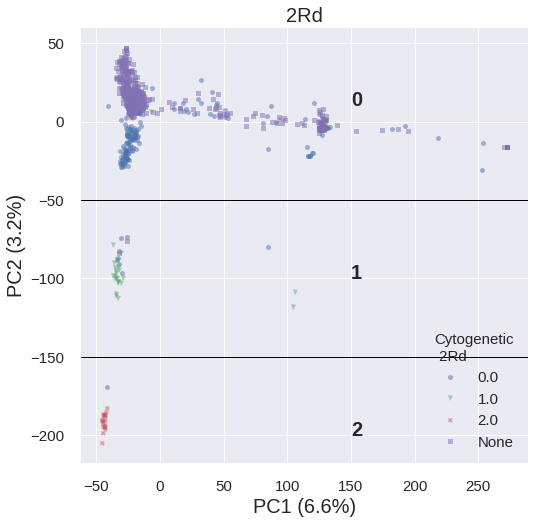

In [22]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
ingenos.plot_pca_coords(coords_2Rd, model_2Rd, 0, 1, ax, md_2R[gam_bool],
                region = "2Rd", label_with = "2Rd",
               alpha = 0.5, title = "2Rd")

ax.text( 150, 10, "0", fontsize = 20, weight = 'bold')
ax.text( 150, -100, "1", fontsize = 20, weight = 'bold')
ax.text( 150, -200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -50, color = 'k', linewidth = 1)
ax.axhline(y = -150, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp(base + "/data/results/2Rd_karyotyping_PCA"));

In [23]:
PCA_2Rd = []

PC1 = coords_2Rd[:, 0]
PC2 = coords_2Rd[:, 1]

assert len(PC1) == len(PC2), "Components are somehow different lengths"

for i in range(len(PC1)):
    
    if PC2[i] >= -50:
        
        PCA_2Rd.append(0)
        
    elif PC2[i] < -50 and PC2[i] > -150:
        
        PCA_2Rd.append(1)
        
    else:
        
        PCA_2Rd.append(2)

##### 2Ru

In [24]:
coords_2Ru, model_2Ru = ingenos.run_pca("2Ru", v_2R, g_2R, samples_bool=non_outliers)

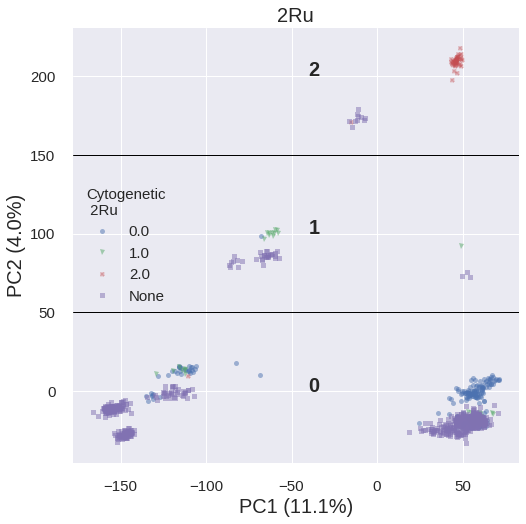

In [25]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
ingenos.plot_pca_coords(coords_2Ru, model_2Ru, 0, 1, ax, md_2R[non_outliers],
                region = "2Ru", label_with = "2Ru",
               alpha = 0.5, title = "2Ru")

ax.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 150, color = 'k', linewidth = 1)
ax.axhline(y = 50, color = 'k', linewidth = 1)

plt.title("2Ru", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp(base + "/data/results/2Ru_karyotyping_PCA"));

In [26]:
PCA_2Ru = []

PC1 = coords_2Ru[:, 0]
PC2 = coords_2Ru[:, 1]

assert len(PC1) == len(PC2), "Components are somehow different lengths"

for i in range(len(PC1)):
    
    if PC2[i] >= 150:
        
        PCA_2Ru.append(2)
        
    elif PC2[i] < 150 and PC2[i] > 50:
        
        PCA_2Ru.append(1)
        
    else:
        
        PCA_2Ru.append(0)

##### merge these in to the metadata

In [27]:
md_2L["new_PCA_2La"] = pd.Series(PCA_2La).values

md_2R.loc[(md_2R["country"] != "Kenya"),"new_PCA_2Rb"] = pd.Series(PCA_2Rb).values

md_2R.loc[non_outliers,"new_PCA_2Rc"] = pd.Series(PCA_2Rc).values
md_2R.loc[non_outliers,"new_PCA_2Ru"] = pd.Series(PCA_2Ru).values

md_2R.loc[j_bool,"new_PCA_2Rj"] = pd.Series(PCA_2Rj).values
md_2R.loc[gam_bool,"new_PCA_2Rd"] = pd.Series(PCA_2Rd).values

md_2L.fillna(value="None", inplace=True)
md_2R.fillna(value="None", inplace=True)

##### save these two metadata files to the desired location